In [1]:
!pip install emoji
!pip install Sastrawi
!pip install google-play-scraper
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.0 MB/s eta 0:00:00


In [2]:
import string
import re
import emoji
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import umap
from google_play_scraper import Sort, reviews
from collections import Counter
warnings.filterwarnings('ignore')
sns.set(style='white', palette='muted', color_codes=True)

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
result, continuation = reviews(
    'com.Info_BMKG',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=5000,
    filter_score_with=None
)

In [4]:
df = pd.DataFrame(np.array(result), columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,7528e062-9548-462c-a0eb-3ec7ddecd921,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Cukup akurat.. Tapi tolong untuk cuaca di bagu...,5,48,3.3.1,2024-10-28 08:29:53,None,NaT,3.3.1
1,0f6581a1-3673-4349-ae27-02f9b9a6d5fc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Stuck di display putih tengahnya hanya ada log...,1,2,3.3.2,2024-10-31 08:10:00,None,NaT,3.3.2
2,27a862bd-d73e-4e2e-898d-eb1377494125,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ada baiknya di tambahkan alarm EWS pada aplika...,3,122,3.3.1,2024-08-13 16:07:59,None,NaT,3.3.1
3,2840ccff-ab86-4aaf-af66-3315cbe221b3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Overall aplikasinya sudah bagus, tetapi tolong...",2,2,3.3.1,2024-10-24 17:34:40,None,NaT,3.3.1
4,afe756b1-ff62-4fba-8153-c2b9c85e0656,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong tambahkan banyak kota dibagian kualitas...,1,6,3.3.1,2024-09-25 07:01:35,None,NaT,3.3.1


In [5]:
df.sort_values(by='at', ascending=False, inplace=True)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
369,7d600781-5631-4e5e-95e4-d13fc27c3133,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Cuaca Terbaik 😇,5,0,3.3.2,2024-11-05 11:20:13,None,NaT,3.3.2
4038,42392a8a-b6a6-423a-9a76-67abfb047aa6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi sampah disini hujan tapi info dari BM...,1,0,None,2024-11-04 11:32:30,None,NaT,None
27,c245a52c-d48b-4e51-bf76-1c55cd68df2b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi nya sangat informatif dan membantu,5,0,3.3.2,2024-11-04 06:30:37,None,NaT,3.3.2
83,9a4a0764-de8e-44aa-bec4-ad375cb8c4c2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat membantu sekali pada setiap kondisi.,5,0,3.3.2,2024-11-04 03:59:07,None,NaT,3.3.2
426,8d1cbbc7-f3e2-48cd-a352-44a64dd8718a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Selalu mengikuti,untuk mendapatkan info terkin...",4,0,3.3.1,2024-11-03 12:39:32,None,NaT,3.3.1
...,...,...,...,...,...,...,...,...,...,...,...
3126,0666d0e3-9b0b-424d-9200-3b6fefba7b66,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagus sekali karena saya tinggal di rawan gemp...,5,0,2.4,2018-09-15 11:26:47,None,NaT,2.4
3021,91960812-894e-4406-9334-4fc725e7ac3b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong gan perbaharui mengenai hujan di indone...,3,1,2.4,2018-09-14 17:21:04,None,NaT,2.4
2968,d0ee1aac-29d7-48bf-aefa-73e4253f7621,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Apk ini sangat membantu .dan saya dpat mengeta...,5,1,2.4,2018-09-14 12:26:23,None,NaT,2.4
3192,97e9cec9-5910-4ea2-8753-543eb940375f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi keren dari BMKG, membantu sekali.",5,1,2.4,2018-09-14 02:53:36,None,NaT,2.4


In [6]:
df.shape

(5000, 11)

In [7]:
df = df.iloc[:, 3:5]
df.reset_index(drop=True, inplace=True)
df.head()

,content,score
0,Cuaca Terbaik 😇,5
1,Aplikasi sampah disini hujan tapi info dari BM...,1
2,Aplikasi nya sangat informatif dan membantu,5
3,sangat membantu sekali pada setiap kondisi.,5
4,"Selalu mengikuti,untuk mendapatkan info terkin...",4


In [8]:
# plt.figure(figsize=(10, 5))
# ax = sns.countplot(x='score', data=df, order=df.score.value_counts().index, palette='Blues_r')
# for container in ax.containers:
#     ax.bar_label(container, label_type='edge', size=10)
# plt.title('Distribution of Ratings')
# plt.show()

In [9]:
def sentiment(score):
  if score <= 2:
    return 'Negative'
  elif score >= 4:
    return 'Positive'

df['score'] = df['score'].apply(lambda x: sentiment(x))

In [10]:
# ax = df.score.value_counts().plot(kind='bar', color='skyblue')
# for container in ax.containers:
#   ax.bar_label(container, size=10, label_type='edge')
# plt.show()

In [11]:
df.isnull().sum()

,0
content,0
score,568


In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(4432, 2)

## Data Preprocessing Part 1

In [14]:
# casefolding
def casefolding(content):
  content = content.lower()
  return content

df['content'] = df['content'].apply(lambda x: casefolding(x))

In [15]:
# cleaning
def cleaning(content):
  content = content.strip(' ') # menghapus spasi di awal dan di akhir
  content = re.sub(r'\d+', '', content) # menghapus angka
  content = content.translate(str.maketrans('','', string.punctuation)) # menghapus punctuation
  content = re.sub(r'\b[a-zA-Z]\b', '', content) # menghapus kata yang hanya terdiri dari satu huruf
  content = re.sub(r'\s+', ' ', content) # menghapus spasi berlebih
  return content

df['content'] = df['content'].apply(lambda x: cleaning(x))

In [16]:
# emoji removal
def emoji_removal(content):
  content = emoji.replace_emoji(content, replace='')
  return content

df['content'] = df['content'].apply(lambda x: emoji_removal(x))

In [17]:
# emoticon removal
def remove_emoticons(content):
    emoticon_pattern = re.compile(r"""
        (?::|;|=) # Kolom, titik koma, atau tanda sama dengan untuk wajah
        (?:-)? # Tanda minus opsional
        (?:\)|\(|D|P|O|/|\\|S) # char yang menunjukkan ekspresi
        """, re.VERBOSE)

    return emoticon_pattern.sub(r'', content)

df['content'] = df['content'].apply(lambda x: remove_emoticons(x))

In [18]:
# norm
norm = {
    'gak': 'tidak',
    'bgt': 'banget',
    'yg': 'yang',
    'tp': 'tapi',
    'gimana': 'bagaimana',
    'aku': 'saya',
    'udh': 'udah',
    'gue': 'saya',
    'emang': 'memang',
    'mau': 'ingin',
    'abis': 'habis',
    'bener': 'benar',
    'nggak': 'tidak',
    'aja': 'saja',
    'gitu': 'begitu',
    'kalo': 'kalau',
    'udah': 'sudah',
    'cuma': 'hanya',
    'tuh': 'itu',
    'utk': 'untuk',
    'dr': 'dari',
    'sy': 'saya',
    'bgus': 'bagus',
    'ucpan': 'ucapan',
    'ssudah': 'sudah',
    'ssaja': 'saja',
    'ga': 'tidak'
}

def normalize(content):
  for i in norm:
    if i in content:
      content = content.replace(i, norm[i])
  return content

df['content'] = df['content'].apply(lambda x: normalize(x))

In [19]:
# tokenisasi
def tokenisasi(content):
  content = word_tokenize(content)
  return content

df['content'] = df['content'].apply(lambda x: tokenisasi(x))

In [20]:
# stopword
factory = StopWordRemoverFactory()
sastrawi_stopwords = factory.get_stop_words()

nltk_stopword = stopwords.words('indonesian')

combine_stopwords = set(sastrawi_stopwords + nltk_stopword)

def stopwords(content):
  content = [word for word in content if word not in combine_stopwords]
  return content

df['content'] = df['content'].apply(lambda x: stopwords(x))

In [21]:
# removal of frequent words
word_frequency_pos = df[df['score'] == 'Positive']['content']
word_frequency_neg = df[df['score'] == 'Negative']['content']

positive_words = [word for tokens in word_frequency_pos for word in tokens]
negative_words = [word for tokens in word_frequency_neg for word in tokens]

positive_freq_dic = FreqDist(positive_words)
negative_freq_dic = FreqDist(negative_words)

display(positive_freq_dic, negative_freq_dic)

FreqDist({'santidakt': 1210, 'gempa': 960, 'aplikasi': 824, 'membantu': 757, 'bagus': 640, 'cuaca': 616, 'bmkg': 433, 'info': 406, 'informasi': 397, 'nya': 385, ...})

FreqDist({'gempa': 441, 'aplikasi': 339, 'update': 262, 'nya': 201, 'info': 178, 'cuaca': 158, 'bmkg': 138, 'sayarat': 118, 'lokasi': 108, 'hujan': 105, ...})

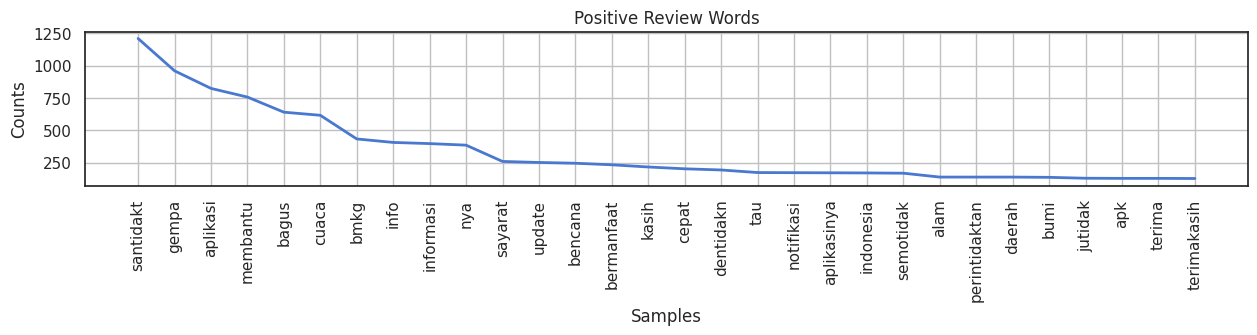

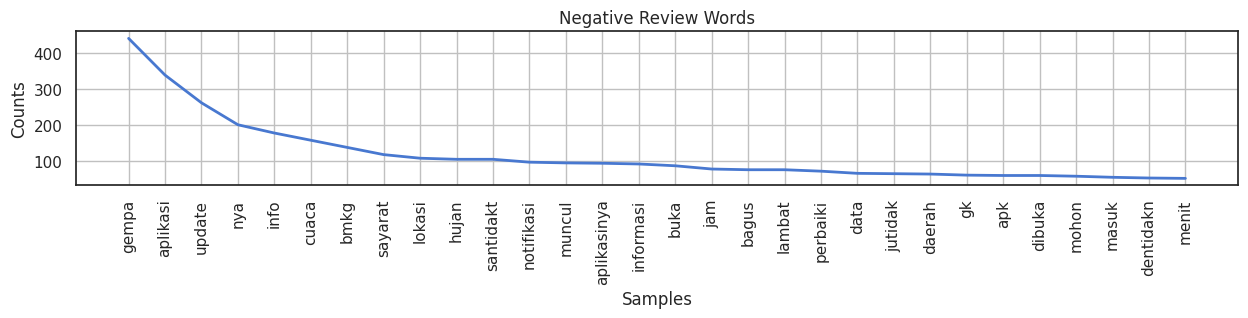

In [22]:
# visualisasi top 30 kata
plt.figure(figsize=(15,2))
positive_freq_dic.plot(30,  title='Positive Review Words');

plt.figure(figsize=(15,2))
negative_freq_dic.plot(30, title='Negative Review Words');

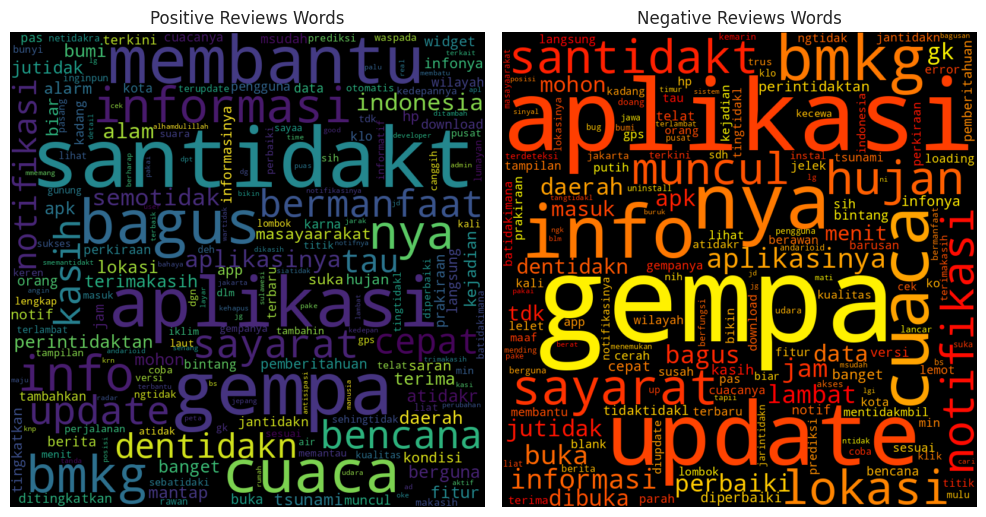

In [23]:
def plot_important_words(pos_dic, neg_dic):
    fig, ax=plt.subplots(ncols=2, figsize=(10,10))

    wc = WordCloud(background_color='black',\
                min_font_size=8, width=800, height=800,\
                        colormap=None ).generate_from_frequencies(pos_dic)
    ax[0].imshow(wc, interpolation='bilinear')
    ax[0].set_title('Positive Reviews Words')
    ax[0].axis('off');

    wc = WordCloud(background_color='black',\
               min_font_size=12, width=800, height=800,\
                     colormap='autumn' ).generate_from_frequencies(neg_dic)
    ax[1].imshow(wc, interpolation='bilinear' )
    ax[1].set_title('Negative Reviews Words')
    ax[1].axis('off');

    fig.set_tight_layout({'pad':1})

plot_important_words(positive_freq_dic, negative_freq_dic)

In [24]:
pos=set(x[0] for x in positive_freq_dic.most_common(20))
neg=set(x[0] for x in negative_freq_dic.most_common(20))

print(neg & pos)
print('\nDari', len(neg), 'kata terdapat', len(neg & pos), 'yang sama')

{'cuaca', 'gempa', 'informasi', 'santidakt', 'sayarat', 'notifikasi', 'aplikasinya', 'bagus', 'update', 'aplikasi', 'nya', 'info', 'bmkg'}

Dari 20 kata terdapat 13 yang sama


In [25]:
pos=set(x[0] for x in positive_freq_dic.most_common(100))
neg=set(x[0] for x in negative_freq_dic.most_common(100))

print(neg & pos)
print('\nDari', len(neg), 'kata terdapat', len(neg & pos), 'yang sama')

{'dentidakn', 'bintang', 'kejadian', 'biar', 'membantu', 'cepat', 'prakiraan', 'santidakt', 'update', 'hp', 'kota', 'info', 'tsunami', 'min', 'langsung', 'bmkg', 'wilayah', 'tdk', 'sih', 'bencana', 'tingtidakl', 'apk', 'pemberitahuan', 'app', 'daerah', 'indonesia', 'tau', 'terima', 'atidakr', 'perbaiki', 'cuaca', 'notifikasi', 'orang', 'infonya', 'perkiraan', 'perintidaktan', 'data', 'fitur', 'buka', 'titik', 'jam', 'cuacanya', 'gempa', 'muncul', 'jantidakn', 'pas', 'informasi', 'hujan', 'terbaru', 'sayarat', 'aplikasinya', 'lokasi', 'jutidak', 'banget', 'kasih', 'bagus', 'mohon', 'aplikasi', 'menit', 'masuk', 'nya', 'download', 'notif'}

Dari 100 kata terdapat 63 yang sama


In [26]:
more_stop_word =[
    'atidakr', 'sama', 'saya', 'kalau', 'terjadi', 'untuk', 'jam', 'dini', 'tidak',
    'yang', 'bisa', 'di', 'baik', 'lama', 'lebih', 'apa', 'selalu', 'notif', 'kejadian',
    'padahal', 'bencana', 'terimakasih', 'ada', 'santidakt', 'apk', 'banget', 'banyak',
    'cuaca', 'notifikasi', 'kasih', 'hujan', 'buka', 'masuk', 'lokasi', 'sering', 'terus',
    'baru', 'app', 'jutidak', 'dulu', 'sekali', 'update', 'buat', 'kurang', 'terima',
    'tsunami', 'malah', 'jadi', 'baru', 'tsunami', 'semotidak', 'kok', 'alarm', 'hp',
    'saran', 'indonesia', 'santidakt', 'jutidak', 'jutidak', 'apk', 'infonya', 'notifikasi',
    'sayarat', 'tdk', 'terbaru', 'hujan', 'dentidakn', 'cuacanya', 'terima', 'mohon', 'barusan',
    'kejadian', 'muncul', 'langsung', 'kasih', 'terimakasih', 'aplikasi', 'perintidaktan', 'tingtidakl',
    'pengguna', 'tau', 'prediksi', 'info', 'biar', 'banget', 'update', 'jantidakn', 'fitur', 'ngtidak',
    'prakiraan', 'sih', 'masuk', 'gps', 'app', 'gempanya', 'data', 'nya', 'jam', 'hp', 'menit', 'kota',
    'ngtidak', 'bencana', 'daerah', 'cepat', 'buka', 'pas', 'aplikasinya', 'sesuai', 'santidakt', 'alam',
    'tampilan', 'bagus', 'pemberitahuan', 'titik', 'wilayah', 'bmkg', 'versi', 'msudah','gempa', 'min',
    'notif', 'cuaca', 'lokasi', 'developer', 'informasi', 'bumi', 'tidaktidak1', 'masayaarakat', 'berawan', 'batidakimana',
    'perbaiki', 'widget', 'kadang', 'download', 'orang', 'klo', 'sehingtidak', 'diperbaiki', 'jepang', 'mentidakmbil',
    'bunyi', 'tidaktidakl', 'perkiraan', 'gk', 'bintang', 'cerah', 'bikin', 'kali', 'dibuka', 'ditingkatkan', 'tingtidak1', 'membantu'
]


positive2_freq_dic={key:value for key,value in positive_freq_dic.items() if key not in more_stop_word}
negative2_freq_dic={key:value for key,value in negative_freq_dic.items() if key not in more_stop_word}

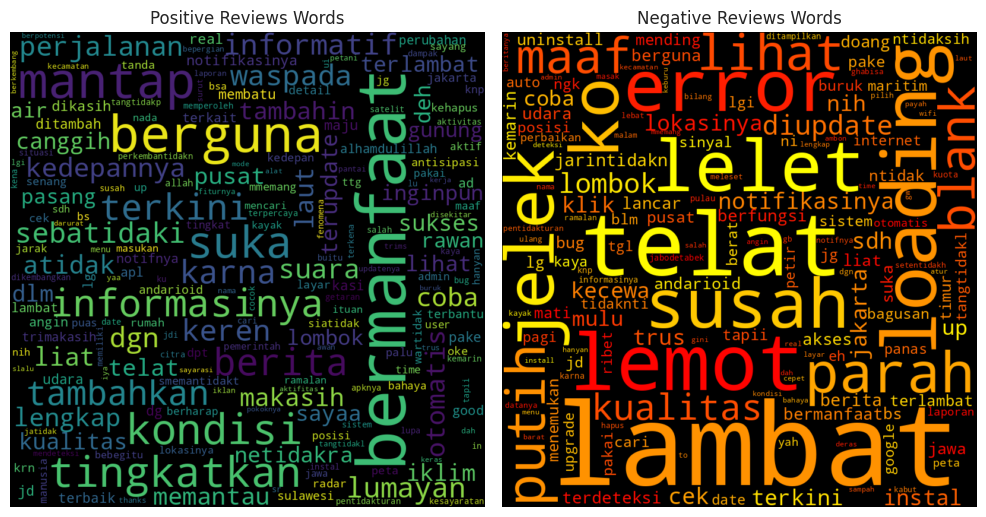

In [27]:
plot_important_words(positive2_freq_dic, negative2_freq_dic)

In [28]:
# stopword removal pt2
def more_stopword(content):
  content = [word for word in content if word not in more_stop_word]
  return content

df['content'] = df['content'].apply(lambda x: more_stopword(x))

In [ ]:
# stemming
def stemming(content):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  text = []
  for i in content:
    x = stemmer.stem(i)
    text.append(x)
  content_clean = []
  content_clean = ' '.join(text)
  print(content_clean)
  return content_clean

df['content'] = df['content'].apply(lambda x: stemming(x))

df.to_csv('bmkg_clean_data.csv')

baik
sampah guna
informatif
kondisi
mengikutiuntuk kini tentamg fenomena iklim
mantap
rivaldi ristiandi pratama
manfaat
berkat menantidakninya
kondisi awan lambang matahari
tampil menu utama stuck logo
halo tambah mode gelap
mengupdate perihal
poko
manfaat terupdate waspada musibah cipta tingkat apknya depan khusus in shaa allah status manfaat keluartidak teman kontak


pantau
updatenya sdh atidak telat
mantap
terima
stuck display putih tentidakhnya logo minggu pantau auto uninstall
tambahin mode gelap
waspada

tampil hilal suoaya ribut idul fitri ramadhan
habis kasi raya
manfaat
jalan tutidaks
manfaat
      
beraktifitas kerja dilapantidakn
manfaat tani
alhamdulilla saran
bida kedepannyatrims

harap mode gelap silau latar putih
maaf kak telat
bagusin interfacenya dlm bentuk tabel lbh bgsdan tangtidakl jg cape scroll liat ampe minggu dpnsemotidak respon
smemantidakt kembang satusatunya perintah suka
overall muncul letak lokasi user muncul jarak lokasi user rada risih

crash mulu appnya

In [ ]:
path = '/content/bmkg_clean_data.csv'

df_clean = pd.read_csv(path)
df_clean.drop('Unnamed: 0', axis=1, inplace=True)
df_clean.head()

In [ ]:
df_clean.shape

In [ ]:
df_clean.isnull().sum()

In [ ]:
df_clean.dropna(inplace=True)

In [ ]:
df_clean.shape

In [ ]:
df_clean['score'].value_counts()

TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(use_idf=True, norm='l2', smooth_idf=True)

with open('bmkg_clean_data.csv', 'r', encoding='utf-8') as file:
    docs = file.readlines()

docs = [doc.strip() for doc in docs]

tf = tfidf_vectorizer.fit_transform(docs).toarray()

num_rows = tf.shape[0]

a = tfidf_vectorizer.get_feature_names_out()

dfbtf = pd.DataFrame(data=tf, index=range(0, num_rows), columns=a)
dfbtf


WORD2VEC

In [ ]:
import gensim
from gensim.models import Word2Vec

with open('bmkg_clean_data.csv', 'r', encoding='utf-8') as file:
    docs = file.readlines()

docs = [doc.strip() for doc in docs]

cbow_model = Word2Vec(docs, vector_size=100, window=5, min_count=1, sg=0, alpha=0.03, min_alpha=0.0007, epochs=100)
skipgram_model = Word2Vec(docs, vector_size=100, window=5, min_count=1, sg=1, alpha=0.03, min_alpha=0.0007, epochs=100)

cbow_model.train(docs, total_examples=len(docs), epochs=100)
skipgram_model.train(docs, total_examples=len(docs), epochs=100)


In [ ]:
import gensim
from gensim.models import Word2Vec


model = gensim.models.Word2Vec('bmkg_clean_data.csv', vector_size=200, window=5, min_count=3, workers=4)
# %cd '/content/drive/MyDrive/Colab Notebooks/pemrotext'
model.save('bmkg_word2vec.model')
model = gensim.models.Word2Vec.load('bmkg_word2vec.model')
w2v = model.wv
w2v.index_to_key[:10]

In [ ]:
w2v.vectors[:10]